In [219]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

In [220]:
#create cross validation object
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

In [221]:
# Load in merged community college data
url = 'https://github.com/BrownRegaSterlingHeinen/PostsecondaryAttainment/blob/master/2016/Machine%20Learning%20Datasets/NCCCData_ML.csv?raw=true'
NCCCData = pd.read_csv(url)

In [222]:
list(NCCCData)

['AdvESL_MeasureableSkills_Participant_POP_MSG',
 'AdvESL_MeasureableSkills_ParticipServed',
 'AdvESL_MeasureableSkills_AHSGrad',
 'AdvESL_MeasureableSkills_HSE',
 'AdvESL_MeasureableSkills_Postsecondary\r\nEnrollment',
 'AdvESL_MeasureableSkills_MSG',
 'Beg_ESL_PCTProgress',
 'LowBeg_ESL_PCTProgress',
 'HighBeg_ESL_PCTProgress',
 'LowInt_ESL_PCTProgress',
 'HighInt_ESL_PCTProgress',
 'Advanced_ESL_PCTProgress',
 'Basic_Skills_CompletingLevel\r\nLEVEL',
 'Basic_Skills_PCTCompleting',
 'Beg_ABE_Lit_PCTProgress',
 'Beg_BasicEd_PCTProgress',
 'LowInt_BasicEd_PCTProgress',
 'HighInt_BasicEd_PCTProgress',
 'Low_AdultSecondary_Students',
 'Low_AdultSecondary_PCTProgress',
 'BegABELit_Participant_POP_MSG',
 'BegABELit_IndividualsServed',
 'BegABELit_Particip/Served',
 'BegABELit_POPs',
 'BegABELit_AHSGrad',
 'BegABELit_HSE',
 'BegABELit_Postsecondary',
 'BegABELit_Posttest',
 'BegABELit_MSG',
 'BegBasicEd_Participant_POP_MSG',
 'BegBasicEd_Particip/Served',
 'BegBasicEd_AHSGrad',
 'BegBasicEd

In [223]:
#Get the median value of each variable in order to create two groups
first_median=NCCCData['First_Year_Progression'].median()

#create high and low groups for each variable
NCCCData['First_Year_Progression_TwoGroups']=np.where(NCCCData['First_Year_Progression']<first_median,"Low","High")

#get the 33rd and 66th percentiles for each variable
first_33=np.percentile(NCCCData['First_Year_Progression'],33)
first_66=np.percentile(NCCCData['First_Year_Progression'],66)

#split into three groups
NCCCData['First_Year_Progression_ThreeGroups']=pd.cut(NCCCData['First_Year_Progression'],[0,first_33,first_66,np.inf],labels=['low','medium','high'])


In [224]:
#Create data frame of target variables

target_variables=NCCCData[["First_Year_Progression","First_Year_Progression_ThreeGroups", "First_Year_Progression_TwoGroups"]]


In [225]:
#find all first year success variables
delete_list=[]

for i in NCCCData.columns:
    if "1stYearSuccess" in i:
        delete_list.append(i)

In [226]:
#Remove all the target variables from the data set
#the number variables represent the passing rate for first time test takers on state mandated exams
delete_list.extend(["First_Year_Progression","First_Year_Progression_ThreeGroups", "First_Year_Progression_TwoGroups","16-17","15-16","13-14","% SUCCESSFUL\r\n14-15",'13-Dec'])
targets_dropped=NCCCData.drop(delete_list,axis=1)

In [227]:
#check that columns where dropped
list(targets_dropped)

['AdvESL_MeasureableSkills_Participant_POP_MSG',
 'AdvESL_MeasureableSkills_ParticipServed',
 'AdvESL_MeasureableSkills_AHSGrad',
 'AdvESL_MeasureableSkills_HSE',
 'AdvESL_MeasureableSkills_Postsecondary\r\nEnrollment',
 'AdvESL_MeasureableSkills_MSG',
 'Beg_ESL_PCTProgress',
 'LowBeg_ESL_PCTProgress',
 'HighBeg_ESL_PCTProgress',
 'LowInt_ESL_PCTProgress',
 'HighInt_ESL_PCTProgress',
 'Advanced_ESL_PCTProgress',
 'Basic_Skills_CompletingLevel\r\nLEVEL',
 'Basic_Skills_PCTCompleting',
 'Beg_ABE_Lit_PCTProgress',
 'Beg_BasicEd_PCTProgress',
 'LowInt_BasicEd_PCTProgress',
 'HighInt_BasicEd_PCTProgress',
 'Low_AdultSecondary_Students',
 'Low_AdultSecondary_PCTProgress',
 'BegABELit_Participant_POP_MSG',
 'BegABELit_IndividualsServed',
 'BegABELit_Particip/Served',
 'BegABELit_POPs',
 'BegABELit_AHSGrad',
 'BegABELit_HSE',
 'BegABELit_Postsecondary',
 'BegABELit_Posttest',
 'BegABELit_MSG',
 'BegBasicEd_Participant_POP_MSG',
 'BegBasicEd_Particip/Served',
 'BegBasicEd_AHSGrad',
 'BegBasicEd

In [228]:
#basic statistics of the high and low groups
print(NCCCData.groupby("First_Year_Progression_TwoGroups",as_index=False)['First_Year_Progression'].mean())
print(NCCCData.groupby("First_Year_Progression_TwoGroups",as_index=False)['First_Year_Progression'].median())
print(NCCCData.groupby("First_Year_Progression_TwoGroups",as_index=False)['First_Year_Progression'].count())

  First_Year_Progression_TwoGroups  First_Year_Progression
0                             High                0.754631
1                              Low                0.653259
  First_Year_Progression_TwoGroups  First_Year_Progression
0                             High                   0.753
1                              Low                   0.667
  First_Year_Progression_TwoGroups  First_Year_Progression
0                             High                      32
1                              Low                      27


In [229]:
#Split into train and test data
#Chose 75/25 train/test split
x_train, x_test, y_train, y_test=train_test_split(targets_dropped,target_variables,test_size=0.25, random_state=0)

print("The train data set shape is: ",x_train.shape)
print("The test data set shape is: ",x_test.shape)

The train data set shape is:  (44, 297)
The test data set shape is:  (15, 297)


In [230]:
#random forest grid search

parameters = { 'n_estimators': [1,5,10,15,20,25,30,35,40,45,50]
              ,'criterion': ['gini','entropy']
              ,'bootstrap': [True,False]
              }

rf_grid = GridSearchCV(estimator=RandomForestClassifier()
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
rf_grid.fit(x_train, y_train["First_Year_Progression_TwoGroups"])

Fitting 10 folds for each of 44 candidates, totalling 440 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done 425 out of 440 | elapsed:  2.4min remaining:    5.1s
[Parallel(n_jobs=8)]: Done 440 out of 440 | elapsed:  2.4min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'n_estimators': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [231]:
#Use the best parameters for our model
rf_grid = rf_grid.best_estimator_

print("The mean accuracy on test data for random forest grid search is: ", rf_grid.score(x_test, y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data for random forest grid search is:  0.533333333333


In [232]:
#Ada boosted random forest grid search model
rf_grid_boosted = AdaBoostClassifier(base_estimator=rf_grid)
rf_grid_boosted.fit(x_train, y_train["First_Year_Progression_TwoGroups"])
print("The mean accuracy on test data for rf grid search boosted is: ", rf_grid_boosted.score(x_test, y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data for rf grid search boosted is:  0.533333333333


In [233]:
#Random forest grid search only using top 10 features
#get top 10 features
top_10_names=rfgrid_ft_imp_df[0:10]["feature_names"]

x_train_reduced = x_train[top_10_names]
x_test_reduced = x_test[top_10_names]


In [234]:
#Random forest grid search only using top 10 features
#get top 10 features

parameters = { 'n_estimators': [1,5,10,15,20,25,30,35,40,45,50]
              ,'criterion': ['gini','entropy']
              ,'bootstrap': [True,False]
              }

rf_grid_reduced= GridSearchCV(estimator=RandomForestClassifier()
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
rf_grid_reduced.fit(x_train_reduced, y_train["First_Year_Progression_TwoGroups"])

Fitting 10 folds for each of 44 candidates, totalling 440 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 440 out of 440 | elapsed:  1.9min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'n_estimators': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [235]:
#Use the best parameters for our model
rf_grid_reduced = rf_grid_reduced.best_estimator_

print("The mean accuracy on test data rf grid search reduced is: ", rf_grid_reduced.score(x_test_reduced, y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data rf grid search reduced is:  0.733333333333


In [236]:
#Random forest grid search boosted model with reduced varaibles
rf_grid_reduced_boosted = AdaBoostClassifier(base_estimator=rf_grid_reduced)
rf_grid_reduced_boosted.fit(x_train_reduced, y_train["First_Year_Progression_TwoGroups"])
print("The mean accuracy on test data rf grid search reduced boosted is: ", rf_grid_reduced_boosted.score(x_test_reduced, y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data rf grid search reduced boosted is:  0.8


In [237]:
#random forest grid search pca
pca = PCA(.95)

pca.fit(x_train)
pca.n_components_

print("In this PCA model, 95% of the variance amounts to", pca.n_components_, "principal components.")

#create model
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)


parameters = { 'n_estimators': [1,5,10,15,20,25,30,35,40,45,50]
              ,'criterion': ['gini','entropy']
              ,'bootstrap': [True,False]
              }

rf_grid_pca = GridSearchCV(estimator=RandomForestClassifier()
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
rf_grid_pca.fit(x_train_pca, y_train["First_Year_Progression_TwoGroups"])

In this PCA model, 95% of the variance amounts to 4 principal components.
Fitting 10 folds for each of 44 candidates, totalling 440 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 440 out of 440 | elapsed:  1.9min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'n_estimators': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [238]:
#Use the best parameters for our model
rf_grid_pca = rf_grid_pca.best_estimator_
rf_grid_pca.fit(x_train_pca,y_train["First_Year_Progression_TwoGroups"])

print("The mean accuracy on test data rf grid search pca is: ", rf_grid_pca.score(x_test_pca, y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data rf grid search pca is:  0.533333333333


In [239]:
#rf grid search pca boosted
rf_grid_pca_boosted = AdaBoostClassifier(base_estimator=rf_grid_pca)
rf_grid_pca_boosted.fit(x_train_pca, y_train["First_Year_Progression_TwoGroups"])
print("The mean accuracy on test data rf grid search pca boosted is: ", rf_grid_pca_boosted.score(x_test_pca, y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data rf grid search pca boosted is:  0.533333333333


In [240]:
#rf grid search reduced pca
pca = PCA(.95)

pca.fit(x_train_reduced)
pca.n_components_

print("In this PCA model, 95% of the variance amounts to", pca.n_components_, "principal components.")

#create model
x_train_pca_reduced = pca.transform(x_train_reduced)
x_test_pca_reduced = pca.transform(x_test_reduced)


parameters = { 'n_estimators': [1,5,10,15,20,25,30,35,40,45,50]
              ,'criterion': ['gini','entropy']
              ,'bootstrap': [True,False]
              }

rf_grid_pca_reduced = GridSearchCV(estimator=RandomForestClassifier()
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
rf_grid_pca_reduced.fit(x_train_pca_reduced, y_train["First_Year_Progression_TwoGroups"])
rf_grid_pca_reduced = rf_grid_pca_reduced.best_estimator_

In this PCA model, 95% of the variance amounts to 2 principal components.
Fitting 10 folds for each of 44 candidates, totalling 440 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 440 out of 440 | elapsed:  1.9min finished


In [241]:
#Use the best parameters for our model
rf_grid_pca_reduced.fit(x_train_pca_reduced,y_train["First_Year_Progression_TwoGroups"])

print("The mean accuracy on test data rf grid search reduced pca is: ", rf_grid_pca_reduced.score(x_test_pca_reduced, y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data rf grid search reduced pca is:  0.533333333333


In [242]:
#rf grid serach reduced pca boosted
rf_grid_pca_reduced_boosted = AdaBoostClassifier(base_estimator=rf_grid_pca_reduced)
rf_grid_pca_reduced_boosted.fit(x_train_pca_reduced, y_train["First_Year_Progression_TwoGroups"])
print("The mean accuracy on test data rf grid search pca boosted is: ", rf_grid_pca_reduced_boosted.score(x_test_pca_reduced, y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data rf grid search pca boosted is:  0.6


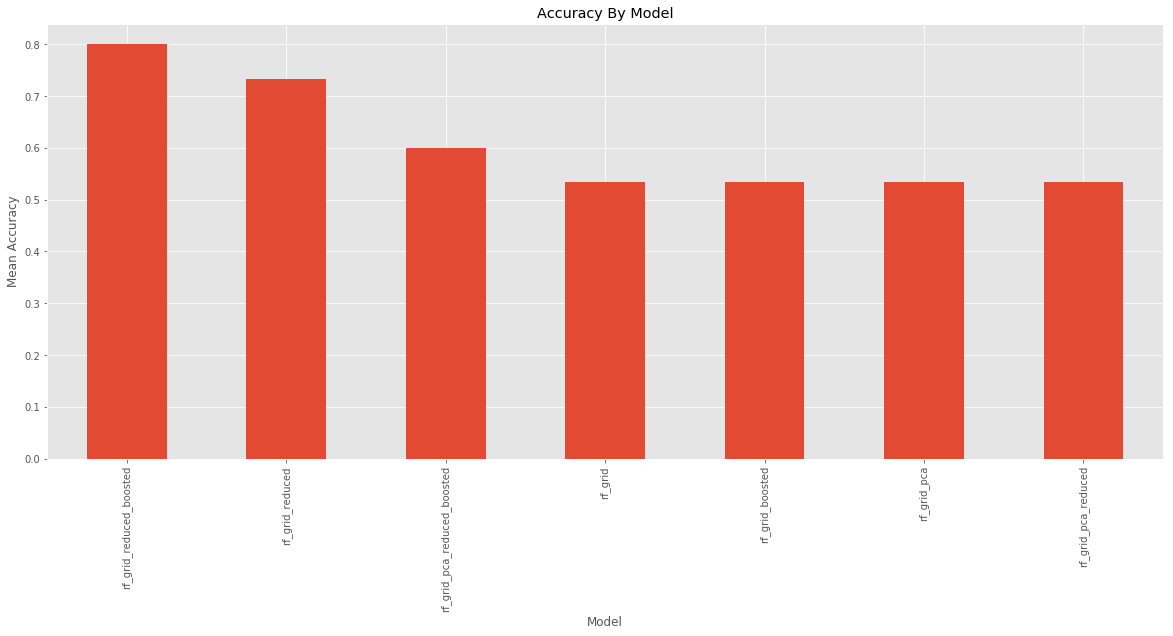

In [243]:
#graph every model's accuracy
rf_grid_acc=rf_grid.score(x_test, y_test["First_Year_Progression_TwoGroups"])

rf_grid_boosted_acc=rf_grid_boosted.score(x_test, y_test["First_Year_Progression_TwoGroups"])

rf_grid_reduced_acc=rf_grid_reduced.score(x_test_reduced, y_test["First_Year_Progression_TwoGroups"])

rf_grid_reduced_boosted_acc=rf_grid_reduced_boosted.score(x_test_reduced, y_test["First_Year_Progression_TwoGroups"])

rf_grid_pca_acc=rf_grid_pca.score(x_test_pca, y_test["First_Year_Progression_TwoGroups"])

rf_grid_pca_reduced_acc=rf_grid_pca_reduced.score(x_test_pca_reduced, y_test["First_Year_Progression_TwoGroups"])

rf_grid_pca_reduced_boosted_acc=rf_grid_pca_reduced_boosted.score(x_test_pca_reduced, y_test["First_Year_Progression_TwoGroups"])


scores=pd.DataFrame({"Model":["rf_grid","rf_grid_boosted","rf_grid_reduced","rf_grid_reduced_boosted","rf_grid_pca","rf_grid_pca_reduced","rf_grid_pca_reduced_boosted"]
                     ,"Accuracy":[rf_grid_acc,rf_grid_boosted_acc,rf_grid_reduced_acc,rf_grid_reduced_boosted_acc,rf_grid_pca_acc,rf_grid_pca_reduced_acc,rf_grid_pca_reduced_boosted_acc]})

scores.sort_values(by='Accuracy', inplace=True, ascending=False )

#print(scores)

%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

weights = pd.Series(scores["Accuracy"].values,index=scores["Model"])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Accuracy By Model")
ax.set_ylabel("Mean Accuracy")
ax.set_xlabel("Model")
plt.show()

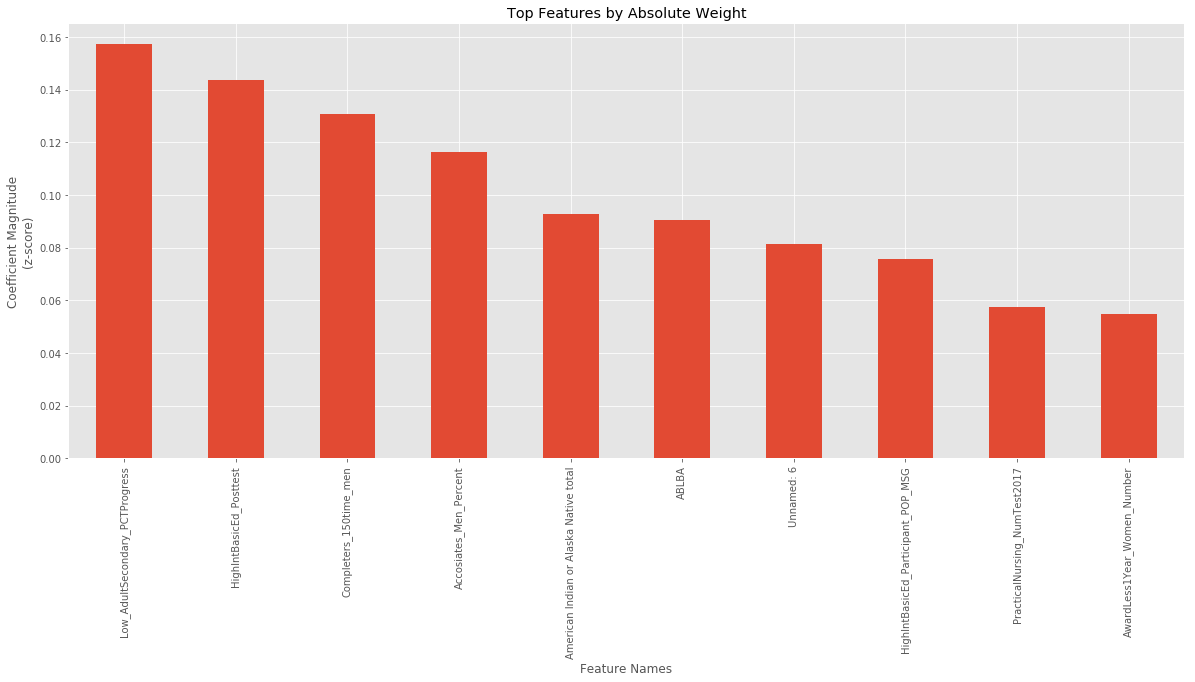

In [245]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
weights = rf_grid_reduced_boosted.feature_importances_
feature_names = x_train_reduced.columns.values
rfgrid_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
rfgrid_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = rfgrid_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Features by Absolute Weight")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

In [270]:
stats=top_10_names.append(pd.Series("First_Year_Progression_TwoGroups"))
full_data_reduced=NCCCData[stats]
stats_df=pd.DataFrame(full_data_reduced.groupby("First_Year_Progression_TwoGroups",as_index=False).mean())
stats_df

,First_Year_Progression_TwoGroups,HighIntBasicEd_Posttest,PracticalNursing_NumTest2017,American Indian or Alaska Native total,Low_AdultSecondary_PCTProgress,AwardLess1Year_Women_Number,HighIntBasicEd_Participant_POP_MSG,ABLBA,Unnamed: 6,Accosiates_Men_Percent,Completers_150time_men
0,High,0.233061,19.494485,20.781250,0.601892,91.121767,0.418275,2.586227,0.295718,33.237500,36.156250
1,Low,0.211926,19.120915,96.148148,0.480000,193.333333,0.362963,4.259259,0.245185,38.096296,49.296296
